In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
chat_gpt_120 = ['chat_gpt', 'temperature=0.1', 0.5539468077116169, 0.013823012834741957, 0.5829687761669027, 0.02248925866193155]

In [2]:
matrix_cpn27_word2vec_norm = [
    ['ACPLT','n_clusters=550',0.49473488205197214,0.0035080086073245413,0.3809248981701389,0.00941552726652473],
    ['kNN', 'n_neighbors=10',0.5223779655206661,0.0057640941066867905,0.4343914204496511,0.011085951988631073],
    ['DecisionTrees','max_leaf_nodes=300',0.34629426935658014,0.00229185387650594,0.23673730151893646,0.009871468331581026],
    ['GaussianNB','var_smoothing=30',0.31520872459784255,0.00398905951377928,0.21425679583574322,0.003926590602743722],
    ['LinearSVC','C=1',0.5876870909143335,0.0039889107249719774,0.45727268252464215,0.006472143142911996],
    ['RandomForest', 'max_depth=10',0.25490449390102804,0.011731477763780591,0.14367746694331493,0.009929728894350337],
    ['XGBoost', 'max_depth=1',0.5444923914081927,0.06358762838275359,0.2373078406599814,0.01878411437836626]
]


matrix_cpn120_word2vec_norm = [
    ['ACPLT','n_clusters=1750',0.5871359744269495,0.0029883868184880096,0.5404219178740665,0.005093942556401926],
    ['kNN','n_neighbors=10',0.6460661126383215,0.0022329937208069176,0.5762931324466083,0.0053217408287317206],
    ['DecisionTrees','max_leaf_nodes=1500',0.5013494765104267,0.0028024858644142697,0.43745340536902927,0.00944682556582543],
    ['GaussianNB','var_smoothing=10',0.6089631136707914,0.0014148079974893137,0.5376601588091002,0.007392443158172325],
    ['LinearSVC','C=1',0.7623650743090005,0.0021998956896611375,0.6607772865536683,0.007857881932707922], 
    ['RandomForest', 'max_depth=10',0.32147549147593535,0.1587368879057807,0.22684732475407485,0.11058196620259197],
    ['XGBoost', 'max_depth=50',0.6821917688134697,0.0037652642235736257,0.5040722196947105,0.011265479242544741]
]


matrix_cpn27_E5_norm = [
    ['ACPLT','n_clusters=550', 0.5450079934898711,0.002418895677481082,0.447959300870835,0.010458983667769777],
    ['kNN', 'n_neighbors=10',0.5947751474550587,0.0030225305128186186,0.5228861843643479,0.007374354622452002],
    ['DecisionTrees','max_leaf_nodes=300',0.37494945999891066,0.0024793530376361877,0.2501043935534417,0.007491211392316167],
    ['GaussianNB','var_smoothing=120',0.4409691762059918,0.020503424717521448,0.30964255975454186,0.00892135469214262],
    ['LinearSVC','C=2.0',0.5584752586270421,0.0014890385641620186,0.47145031153989725,0.012942858141638968], 
    ['RandomForest', 'max_depth=20',0.26215886850973996,0.013410241803311474,0.14814169782639747,0.011444806502431992],
    ['XGBoost', 'max_depth=5',0.5710430114414088,0.06662117548656744,0.236135719574153,0.01555699802345873]
]


matrix_cpn120_E5_norm = [
    ['ACPLT','n_clusters=1750',0.5993048973826417,0.0036805261399305697,0.5449097923610365,0.007604136233535429],
    ['kNN','n_neighbors=10',0.6595766591191214,0.001956928307995,0.6078336800073364,0.00828244271505432],
    ['DecisionTrees','max_leaf_nodes=1500',0.4880272662544531,0.00339435346147724,0.42747328679558666,0.009652737249810132],
    ['GaussianNB','var_smoothing=1.0',0.6289386359324798,0.002085718530727808,0.5383821065584968,0.010280200392391166],
    ['LinearSVC','C=1',0.5788350836334165,0.0034050674608400353,0.531226674365499,0.009854088685825936], 
    ['RandomForest', 'max_depth=50',0.561721745547937,0.00947464779816387,0.4079261633944643,0.009698683100167953],
    ['XGBoost', 'max_depth=5',0.25839551719169473,0.04940902172945035,0.19096470091569073,0.03259473704437623],
    ['chat_gpt', 'temperature=0.1', 0.5539468077116169, 0.013823012834741957, 0.5829687761669027, 0.02248925866193155]
]



cols = ['model', 'best_param', 'train_mean', 'train_std', 'test_mean', 'test_std']

df_cpn27_w2v = pd.DataFrame(matrix_cpn27_word2vec_norm, columns=cols)
df_cpn120_w2v = pd.DataFrame(matrix_cpn120_word2vec_norm, columns=cols)
df_cpn27_e5 = pd.DataFrame(matrix_cpn27_E5_norm, columns=cols)
df_cpn120_e5 = pd.DataFrame(matrix_cpn120_E5_norm, columns=cols)

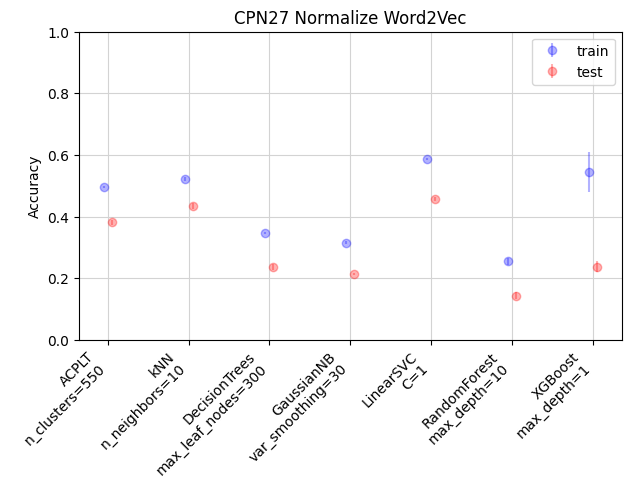

In [28]:
arr = np.arange(len(df_cpn27_w2v['model']))
espacio = 0.05

plt.figure(figsize=(7,4))
plt.xticks(np.arange(len(df_cpn27_w2v['model'])), df_cpn27_w2v['model']+'\n'+ df_cpn27_w2v['best_param'])
plt.errorbar(arr-espacio, df_cpn27_w2v['train_mean'], yerr= df_cpn27_w2v['train_std'], color='blue',fmt ='o', alpha=0.3)
plt.errorbar(arr+espacio, df_cpn27_w2v['test_mean'], yerr=df_cpn27_w2v['test_std'], color='red', fmt ='o', alpha=0.3)
plt.legend(['train', 'test'])
plt.ylim([0.0, 1.0])
plt.title('CPN27 Normalize Word2Vec')
plt.grid(color='lightgray')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.savefig(r'../data/results/IMG/CPN27_Norm_W2V_v2.png')

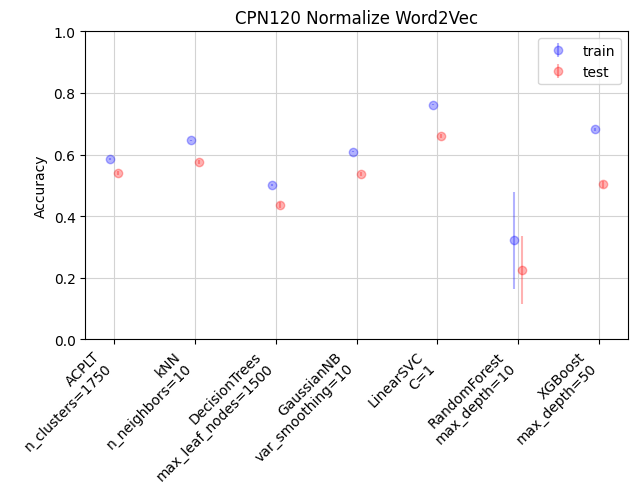

In [5]:
arr = np.arange(len(df_cpn120_w2v['model']))
espacio = 0.05

plt.figure(figsize=(7,4))
plt.xticks(np.arange(len(df_cpn120_w2v['model'])), df_cpn120_w2v['model']+'\n'+df_cpn120_w2v['best_param'])
plt.errorbar(arr-espacio, df_cpn120_w2v['train_mean'], yerr= df_cpn120_w2v['train_std'], color='blue',fmt ='o', alpha=0.3)
plt.errorbar(arr+espacio, df_cpn120_w2v['test_mean'], yerr=df_cpn120_w2v['test_std'], color='red', fmt ='o', alpha=0.3)
plt.legend(['train', 'test'])
plt.ylim([0.0, 1.0])
plt.title('CPN120 Normalize Word2Vec')
plt.grid(color='lightgray')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.savefig(r'../data/results/IMG/CPN120_Norm_W2V_v2.png')

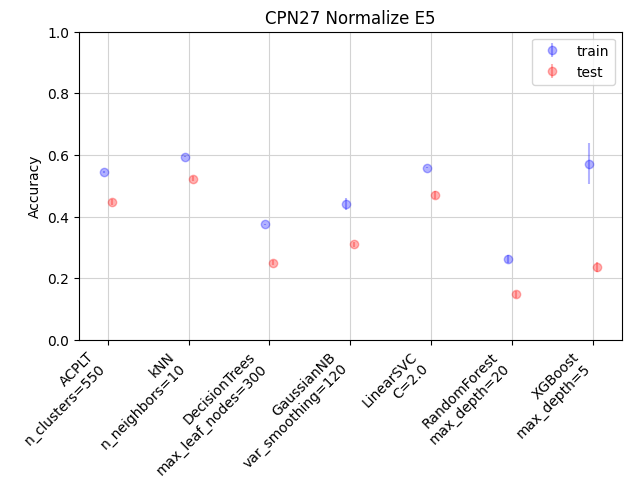

In [4]:
arr = np.arange(len(df_cpn27_e5['model']))
espacio = 0.05

plt.figure(figsize=(7,4))
plt.xticks(np.arange(len(df_cpn27_e5['model'])), df_cpn27_e5['model']+'\n'+df_cpn27_e5['best_param'])
plt.errorbar(arr-espacio, df_cpn27_e5['train_mean'], yerr= df_cpn27_e5['train_std'], color='blue',fmt ='o', alpha=0.3)
plt.errorbar(arr+espacio, df_cpn27_e5['test_mean'], yerr=df_cpn27_e5['test_std'], color='red', fmt ='o', alpha=0.3)
plt.legend(['train', 'test'])
plt.ylim([0.0, 1.0])
plt.title('CPN27 Normalize E5')
plt.grid(color='lightgray')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.savefig(r'../data/results/IMG/CPN27_Norm_E5_v2.png')

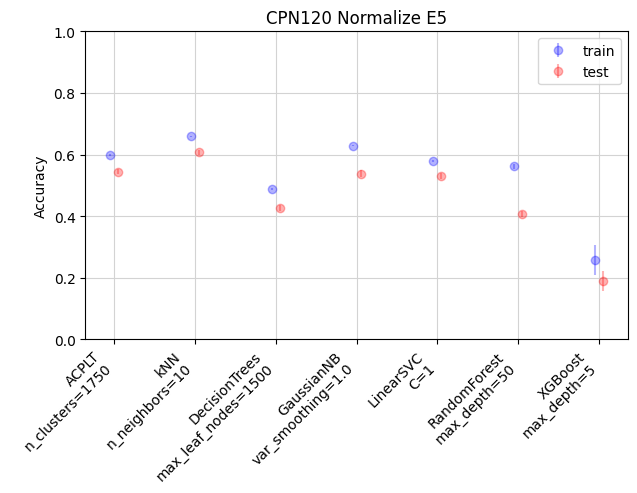

In [4]:
arr = np.arange(len(df_cpn120_e5['model']))
espacio = 0.05

plt.figure(figsize=(7,4))
plt.xticks(np.arange(len(df_cpn120_e5['model'])), df_cpn120_e5['model']+'\n'+df_cpn120_e5['best_param'])
plt.errorbar(arr-espacio, df_cpn120_e5['train_mean'], yerr= df_cpn120_e5['train_std'], color='blue',fmt ='o', alpha=0.3)
plt.errorbar(arr+espacio, df_cpn120_e5['test_mean'], yerr=df_cpn120_e5['test_std'], color='red', fmt ='o', alpha=0.3)
plt.legend(['train', 'test'])
plt.ylim([0.0, 1.0])
plt.title('CPN120 Normalize E5')
plt.grid(color='lightgray')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.savefig(r'../data/results/IMG/CPN120_Norm_E5_v2.png')

# Kappa

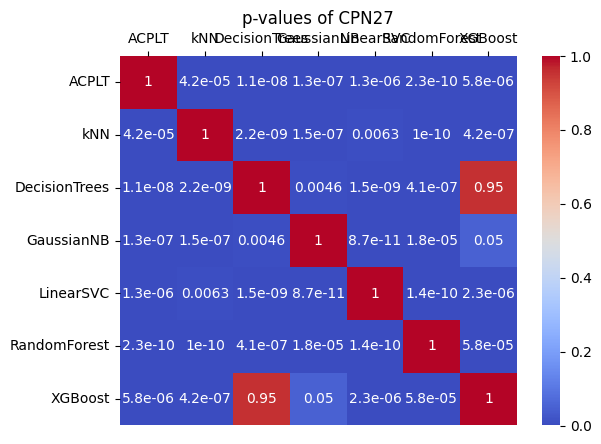

In [14]:
from scipy import stats
import numpy as np
import seaborn as sns

n=5
p_values_cpn27 = np.zeros((7,7))
# order=['k-Means', 'kNN', 'DecisionTrees', 'GaussianNB', 'LinearSVC', 'RandomForest', 'XGBoost']
order = df_cpn27_w2v['model']

CPN27_ACPLT_mean = df_cpn27_w2v['test_mean']
CPN27_ACPLT_std = df_cpn27_w2v['test_std']


for i in range(7):
    for j in range(7):
        v1 = (CPN27_ACPLT_std[i]**2)/n
        v2 = (CPN27_ACPLT_std[j]**2)/n
        t_stat = (CPN27_ACPLT_mean[i]-CPN27_ACPLT_mean[j])/(np.sqrt(v1 + v2))
        df = ((v1+v2)**2) / (((v1**2)/(n-1))+((v2**2)/(n-1)))
        p_values_cpn27[i,j] = stats.t.sf(np.abs(t_stat), df=df)*2


# print("p-value:\n", p_values)

ax = sns.heatmap(p_values_cpn27,cmap='coolwarm', annot=True, xticklabels = order, yticklabels = order)
ax.set_title('p-values of CPN27')
ax.xaxis.tick_top()

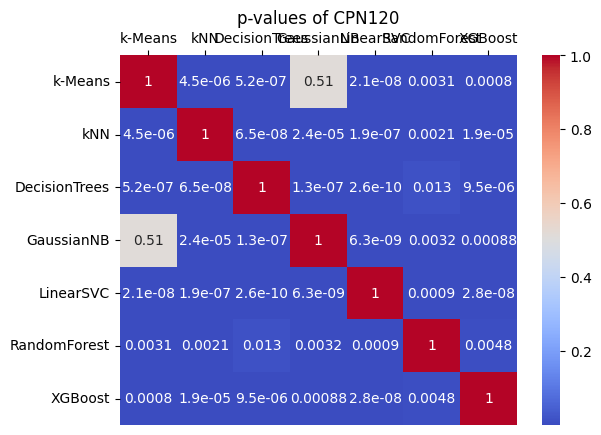

In [10]:
from scipy import stats
import numpy as np
import seaborn as sns

n=5
p_values_cpn27 = np.zeros((7,7))
order=['k-Means', 'kNN', 'DecisionTrees', 'GaussianNB', 'LinearSVC', 'RandomForest', 'XGBoost']

CPN27_ACPLT_mean = df_cpn120_w2v['test_mean']
CPN27_ACPLT_std = df_cpn120_w2v['test_std']


for i in range(7):
    for j in range(7):
        v1 = CPN27_ACPLT_std[i]**2/n
        v2 = CPN27_ACPLT_std[j]**2/n
        t_stat = (CPN27_ACPLT_mean[i]-CPN27_ACPLT_mean[j])/(np.sqrt(v1 + v2))
        df = ((v1+v2)**2) / (((v1**2)/(n-1))+((v2**2)/(n-1)))
        p_values_cpn27[i,j] = stats.t.sf(np.abs(t_stat),df)*2


# print("p-value:\n", p_values)

ax = sns.heatmap(p_values_cpn27,cmap='coolwarm', annot=True, xticklabels = order, yticklabels = order)
ax.set_title('p-values of CPN120')
ax.xaxis.tick_top()

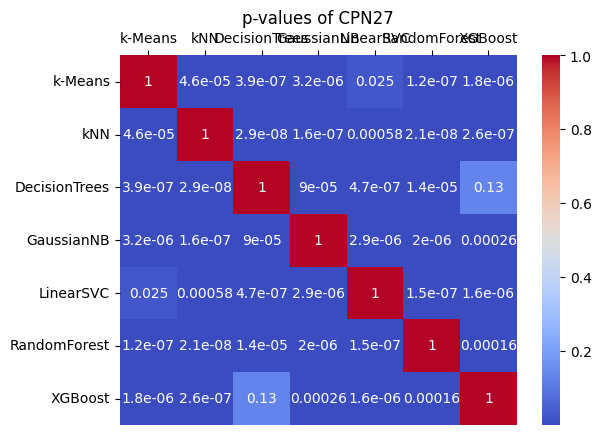

In [16]:
from scipy import stats
import numpy as np
import seaborn as sns

n=5
p_values_cpn27 = np.zeros((7,7))
order=['k-Means', 'kNN', 'DecisionTrees', 'GaussianNB', 'LinearSVC', 'RandomForest', 'XGBoost']

CPN27_ACPLT_mean = df_cpn27_e5['test_mean']
CPN27_ACPLT_std = df_cpn27_e5['test_std']


for i in range(7):
    for j in range(7):
        v1 = CPN27_ACPLT_std[i]**2/n
        v2 = CPN27_ACPLT_std[j]**2/n
        t_stat = (CPN27_ACPLT_mean[i]-CPN27_ACPLT_mean[j])/(np.sqrt(v1 + v2))
        df = ((v1+v2)**2) / (((v1**2)/(n-1))+((v2**2)/(n-1)))
        p_values_cpn27[i,j] = stats.t.sf(np.abs(t_stat),n)*2


# print("p-value:\n", p_values)

ax = sns.heatmap(p_values_cpn27,cmap='coolwarm', annot=True, xticklabels = order, yticklabels = order)
ax.set_title('p-values of CPN27')
ax.xaxis.tick_top()

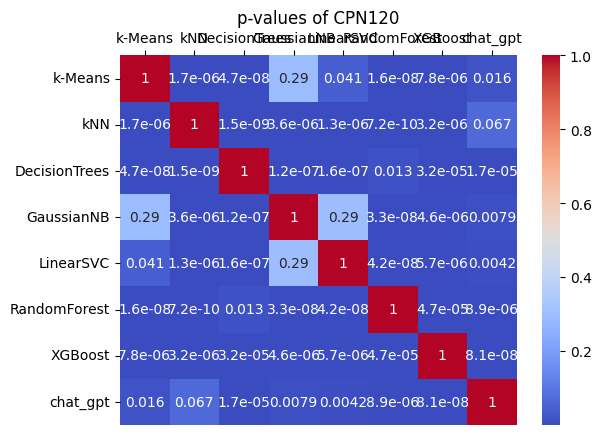

In [3]:
from scipy import stats
import numpy as np
import seaborn as sns

n=5
p_values_cpn27 = np.zeros((8,8))
order=['k-Means', 'kNN', 'DecisionTrees', 'GaussianNB', 'LinearSVC', 'RandomForest', 'XGBoost', 'chat_gpt']

CPN27_ACPLT_mean = df_cpn120_e5['test_mean']
CPN27_ACPLT_std = df_cpn120_e5['test_std']


for i in range(8):
    for j in range(8):
        v1 = CPN27_ACPLT_std[i]**2/n 
        v2 = CPN27_ACPLT_std[j]**2/n
        t_stat = (CPN27_ACPLT_mean[i]-CPN27_ACPLT_mean[j])/(np.sqrt(v1+ v2))
        df = ((v1+v2)**2) / (((v1**2)/(n-1))+((v2**2)/(n-1)))
        p_values_cpn27[i,j] = stats.t.sf(np.abs(t_stat),df)*2


# print("p-value:\n", p_values)

ax = sns.heatmap(p_values_cpn27,cmap='coolwarm', annot=True, xticklabels = order, yticklabels = order)
ax.set_title('p-values of CPN120')
ax.xaxis.tick_top()

In [9]:
from scipy import stats
import numpy as np
import seaborn as sns

n=5
p_values_cpn120 = np.zeros(7)
order=['k-Means', 'kNN', 'DecisionTrees', 'GaussianNB', 'LinearSVC', 'RandomForest', 'XGBoost']

CPN27_ACPLT_mean = df_cpn120_e5['test_mean']
CPN27_ACPLT_std = df_cpn120_e5['test_std']


for i in range(7):
    # for j in range(7):
    v1 = CPN27_ACPLT_std[i]**2/n
    v2 = chat_gpt_120[4]**2/n
    t_stat = (CPN27_ACPLT_mean[i]-chat_gpt_120[3])/(np.sqrt(v1 + v2))
    df = ((v1+v2)**2) / (((v1**2)/(n-1))+((v2**2)/(n-1)))
    p_values_cpn120[i] = stats.t.sf(np.abs(t_stat),df)*2


print("p-value:\n", p_values_cpn120)

# ax = sns.heatmap(p_values_cpn120,cmap='coolwarm', annot=True, xticklabels = order, yticklabels = order)
# ax.set_title('p-values of CPN120')
# ax.xaxis.tick_top()

p-value:
 [0.11131235 0.08492911 0.18779581 0.1145308  0.11817838 0.20517037
 0.53452234]
